In [42]:
import io
import csv
import time
import random
import math
import os, re, glob
from pathlib import Path
import pandas as pd
from rdkit.Chem import PandasTools
import numpy as np
import numpy
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import RDKFingerprint, SDMolSupplier

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "AMES_Sized_Data"

In [28]:
AMES = pd.read_csv('AMES_Data.csv',names=['Smiles','Mutagenicity'])
num_AMES_mols = len(AMES.index)
print('number of molecules in AMES Dataset is = ' , num_AMES_mols)
AMES_mol = [Chem.MolFromSmiles(smi) for smi in AMES.Smiles if smi is not None]
Num_AMES_Atoms = [MolN.GetNumAtoms() for MolN in AMES_mol]
biggest_mol_size = max(Num_AMES_Atoms)
print('biggest molecule in AMES Dataset has ' , biggest_mol_size, 'atoms.')

jmax = math.ceil(biggest_mol_size/10)

for j in range(1,jmax+1):
    size = j*10
    sizedown = size-10
    with io.open(str(DATA/ "AMES_sub_") + str(size) + ".txt",'w') as f:
            for index, i in enumerate(AMES.index):
                if  sizedown <= Num_AMES_Atoms[index] < size :
                    molsize = AMES.Smiles[index]
                    molmotagen = AMES.Mutagenicity[index]
                    f.write(str(molsize) +"  "+ str(molmotagen))
                    f.write('\n')

f.close()                      


number of molecules in AMES Dataset is =  6512
biggest molecule in AMES Dataset has  214 atoms.


In [45]:
directory = 'AMES_Sized_Data/'
with io.open("AMES_size_distribution" + ".txt",'w') as g:
            files = glob.glob(os.path.join(directory, '*.txt'))
            files.sort(key=lambda x:[int(c) if c.isdigit() else c for c in re.split(r'(\d+)', x)])
            count = 0  
            for infile in files:
                f = open(infile, "r")
                count = count + 1
                size = count * 10
                num_mols = len(f.readlines())
                g.write(str(size) +"  "+ str(num_mols))
                g.write('\n')

g.close()         

<BarContainer object of 22 artists>

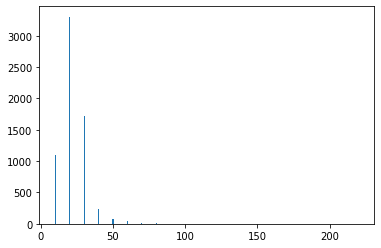

In [65]:
df = pd.read_fwf('AMES_size_distribution.txt')
df.to_csv('AMES_size_distribution.csv')
data = pd.read_csv('AMES_size_distribution.csv',names=['ind','NumAtm','Freq'])
fig, ax = plt.subplots()
ax.bar(data['NumAtm'], data['Freq'])